In [94]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import statsmodels.api as sm

In [95]:
df = pd.read_csv('insurance_claims.csv')

# Data Cleaning

In [96]:
df.head()
# Question mark in police_report_available.

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,10/17/2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,9/6/2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,5/25/1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [98]:
def replace_question_marks(df):
    '''
    Replaces the question marks in the data set with blanks for visualization purposes.
    '''
    return df.replace(to_replace='?', value=np.nan)

In [99]:
def detailed_info(df):
    '''
    For visual purposes, creating a DataFrame to visualize different aspects for each column of data. Additionally, serves as easy reference for data exploration purposes.
    '''
    df = replace_question_marks(df)
    list_dtypes = []
    list_uniq = []
    list_nulls = []
    for col in df.columns:
        col_type = str(df[col].dtype)
        list_dtypes.append(col_type)
        list_uniq.append(df[col].nunique())
        list_nulls.append(df[col].isnull().sum())
    info = pd.DataFrame(data=np.array([list_dtypes, list_uniq, list_nulls]).T, columns=['Data Type', 'Unique Vals', 'Nulls'], index=df.columns)
    info['Column Name'] = info.index
    info.reset_index(inplace=True)
    return df, info.reindex(['Column Name', 'Data Type', 'Unique Vals', 'Nulls'], axis=1)

In [100]:
df, info_df = detailed_info(df)

In [101]:
info_df['Unique Vals'] = info_df['Unique Vals'].astype('int')
info_df['Nulls'] = info_df['Nulls'].astype('int')

In [102]:
info_df.sort_values(by='Nulls', ascending=False)

,Column Name,Data Type,Unique Vals,Nulls
39,_c39,float64,0,1000
27,property_damage,object,2,360
30,police_report_available,object,2,343
19,collision_type,object,3,178
28,bodily_injuries,int64,3,0
22,incident_state,object,7,0
23,incident_city,object,7,0
24,incident_location,object,1000,0
25,incident_hour_of_the_day,int64,24,0
26,number_of_vehicles_involved,int64,4,0


In [103]:
def create_missing_vals_visual(df):
    '''
    Constructs a heatmap of the missing values for dataset.
    '''
    plt.rcParams['figure.dpi'] = 135
    plt.figure(figsize=(13, 8))
    g = sns.heatmap(df.isnull(), cmap='viridis', xticklabels=True, yticklabels=True)
    g.set_xlabel('Column Name')
    g.set_ylabel('Count of Missing Values')
    g.set_yticks([i for i in range(0, 1001, 50)])  # Set the y tick intervals
    g.set_yticklabels([str(i) for i in range(0, 1001, 50)])  # Attaches name to each y tick interval
    g.set_title('Heatmap of Missing Values')

    return g

<AxesSubplot:title={'center':'Heatmap of Missing Values'}, xlabel='Column Name', ylabel='Count of Missing Values'>

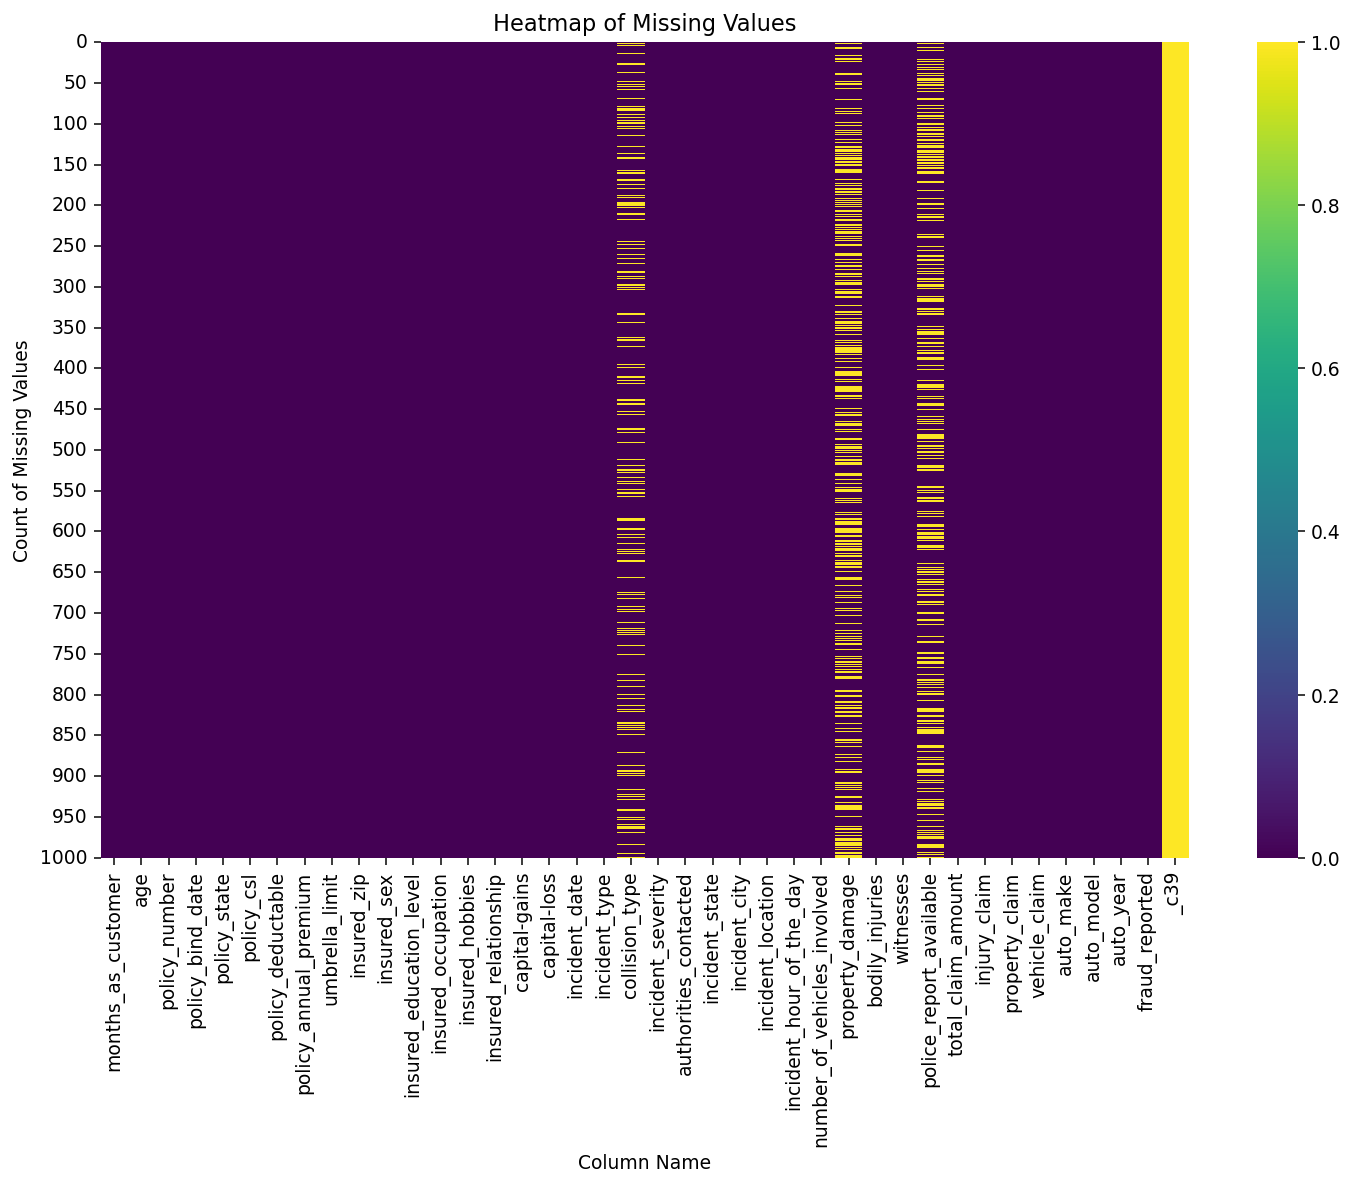

In [104]:
g = create_missing_vals_visual(df)
g

Ideally, do not drop the missing data. There are a total of 1000 columns and approximately 1/3 would be dropped for missing data (neglecting the _c39 data column which is completely empty).

In [105]:
def fill_missing_values(df):
    '''
    Fills the missing values for columns collision_type, property_damage, police_report_available.
    '''
    df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0])  # Index 0 to grab the value returned.
    df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])
    df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])

    return df

In [106]:
df = fill_missing_values(df)

In [107]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

# Examining variables and correlations between different metrics

In [109]:
info_df.sort_values(by=['Unique Vals'], ascending=False)

,Column Name,Data Type,Unique Vals,Nulls
2,policy_number,int64,1000,0
24,incident_location,object,1000,0
9,insured_zip,int64,995,0
7,policy_annual_premium,float64,991,0
3,policy_bind_date,object,951,0
31,total_claim_amount,int64,763,0
34,vehicle_claim,int64,726,0
32,injury_claim,int64,638,0
33,property_claim,int64,626,0
0,months_as_customer,int64,391,0


In [110]:
def create_corr_map(df):
    '''
    Creates heatmap for correlation between different features.
    '''
    plt.figure(figsize=(9.5, 6))
    g = sns.heatmap(df.corr(), cmap='viridis', linecolor='black', linewidths=1, annot=True, annot_kws={'size': 100/len(df.corr())})
    g.set_xlabel('Numerical Columns', fontsize=8)
    g.set_ylabel('Numerical Columns', fontsize=8)
    g.set_title('Correlation Heatmap of DataFrame')

    return g

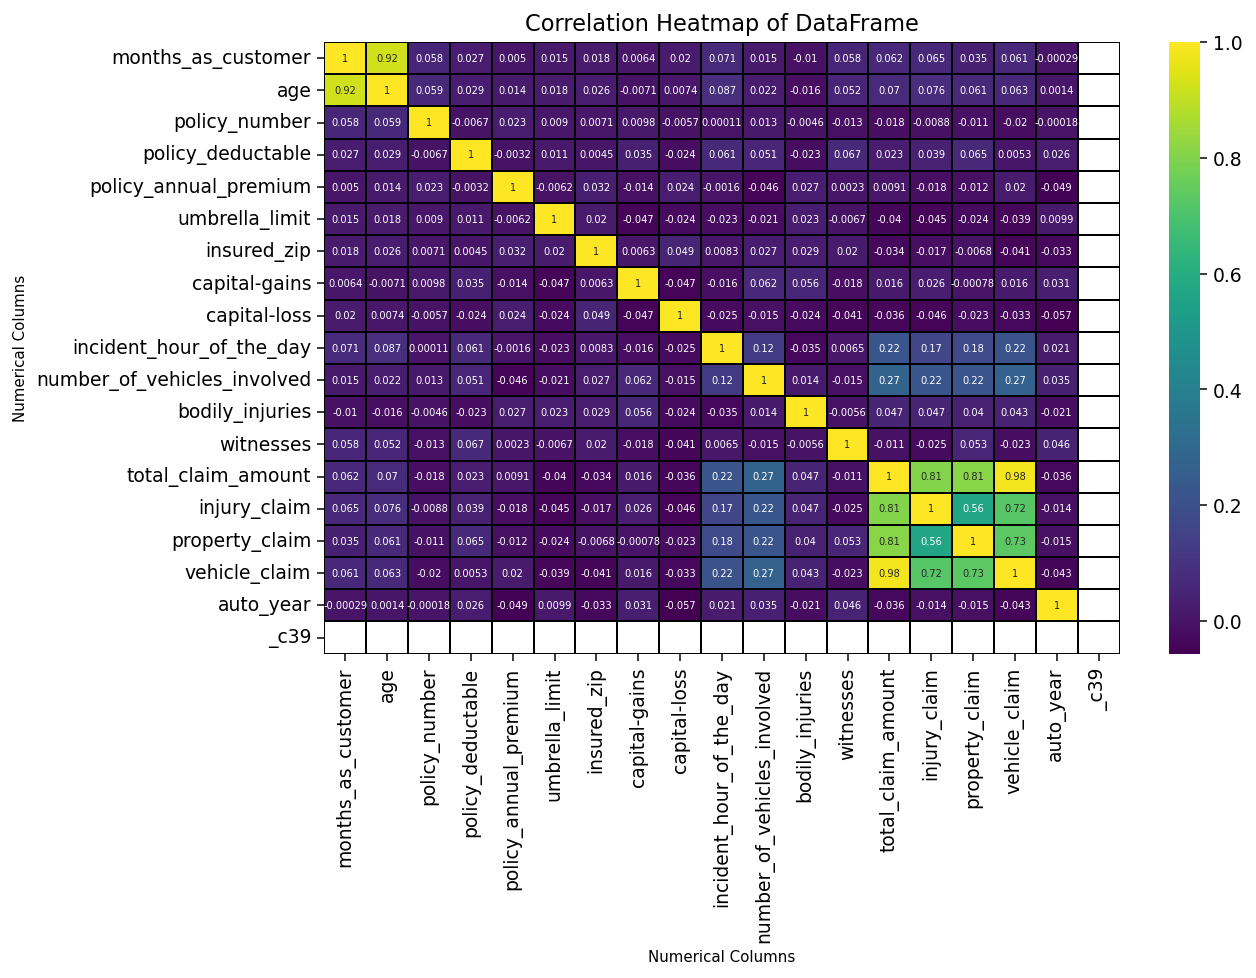

In [111]:
g2 = create_corr_map(df)

In [112]:
# Drop _c39
df = df.drop(columns=['_c39'])

Getting rid of colliniearity variables

In [113]:
df.select_dtypes('number').isna().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
capital-gains                  0
capital-loss                   0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
bodily_injuries                0
witnesses                      0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
auto_year                      0
dtype: int64

In [114]:
def variance_inflation_factor(df):
    '''
    Calculates Variance Inflation Factor for variables to determine collinearity.
    '''
    vif_df = pd.DataFrame(columns=['Feature', 'VIF'])
    features = df.select_dtypes('number').columns
    for i in range(len(features)):  # For each feature
        var_1 = df[features[i]]  # Select loop feature column
        var_other = df[features.drop(features[i])]  # All other data columns
        r_2 = sm.OLS(var_1, var_other).fit().rsquared  # R2 between feature and all other features
        vif = round(1/(1-r_2), 2)  # Calculate variance inflation factor
        vif_df.loc[i] = [features[i], vif]
    return vif_df.sort_values(by=['VIF'], ascending=False)

In [115]:
vif_df = variance_inflation_factor(df)

C:\Users\clgme\AppData\Local\Temp/ipykernel_21300/3479185889.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  vif = round(1/(1-r_2), 2)  # Calculate variance inflation factor


In [116]:
vif_df
# VIF values greater than 5 demonstrate extreme multicollinearity
# VIF values less than 5 but greater than 1 demonstrate moderate multicollinearity
# VIF values = 1 demonstrate low multicollinearity.

# From the heatmap of correlation:
    #    vehicle claim, property claim, injury claim, and total claim amount    
    #    have extremely high correlation.
    #    closer examination shows that total claim amount is a sum of vehicle
    #    claim, property claim, and injury claim. Drop total claim amount
    #    Also drop features with large number of distinct values that can't be converted to categories effectively (improve model variance.):
            # policy_number, incident location, insured zip, policy_bind_date, etc.
# Also variables that are not relevant
        # insured_hobbies, auto_model, auto_year, auto_make

,Feature,VIF
16,vehicle_claim,inf
15,property_claim,inf
14,injury_claim,inf
13,total_claim_amount,inf
17,auto_year,135.52
1,age,130.17
6,insured_zip,50.37
0,months_as_customer,28.05
4,policy_annual_premium,27.77
2,policy_number,5.55


In [117]:
def drop_columns(df):
    '''
    Drops columns with either high correlation with other columns, columns with large quantities of unique values.
    '''
    return df.drop(columns=['age', 'total_claim_amount', 'policy_number', 'incident_location', 'incident_city', 'incident_date','insured_zip', 'policy_bind_date'])

In [118]:
df = drop_columns(df)

In [119]:
# Now, rerun the VIF calculations
vif_df = variance_inflation_factor(df)

In [120]:
vif_df

,Feature,VIF
13,auto_year,44.62
2,policy_annual_premium,27.68
12,vehicle_claim,16.18
11,property_claim,7.42
10,injury_claim,7.06
7,number_of_vehicles_involved,4.67
1,policy_deductable,4.55
0,months_as_customer,4.20
6,incident_hour_of_the_day,4.06
9,witnesses,2.85


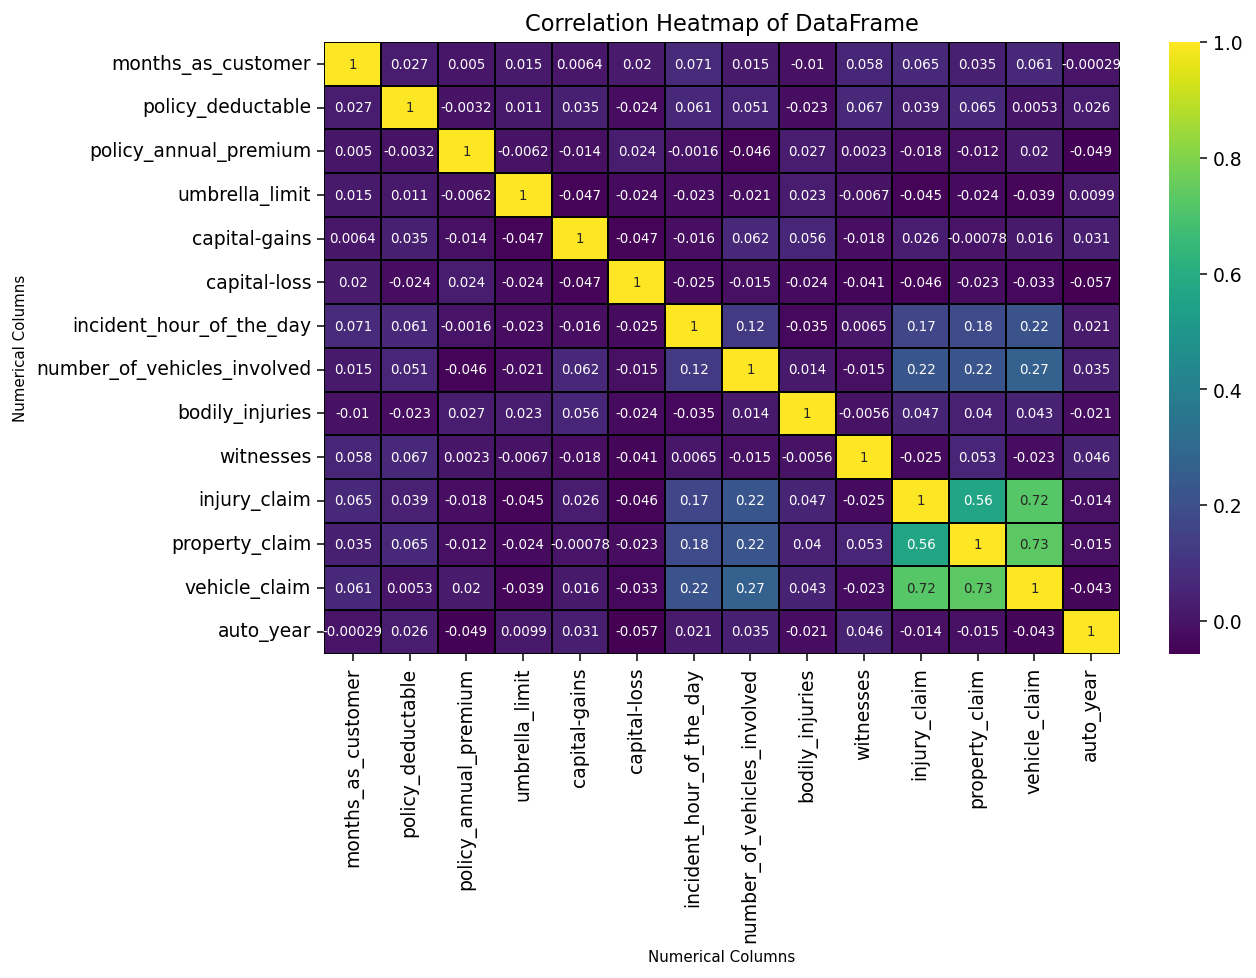

In [121]:
g = create_corr_map(df)

In [122]:
# for col in df.select_dtypes('number').columns:
#     plt.hist(df[df.select_dtypes('number').columns][col], edgecolor='black', linewidth=1.2)
#     plt.title(col)
#     plt.show()

# Exploring Fraud Reported by Different Variables

In [123]:
df.select_dtypes('object').columns

Index(['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'property_damage',
       'police_report_available', 'auto_make', 'auto_model', 'fraud_reported'],
      dtype='object')

Text(0, 0.5, 'Count')

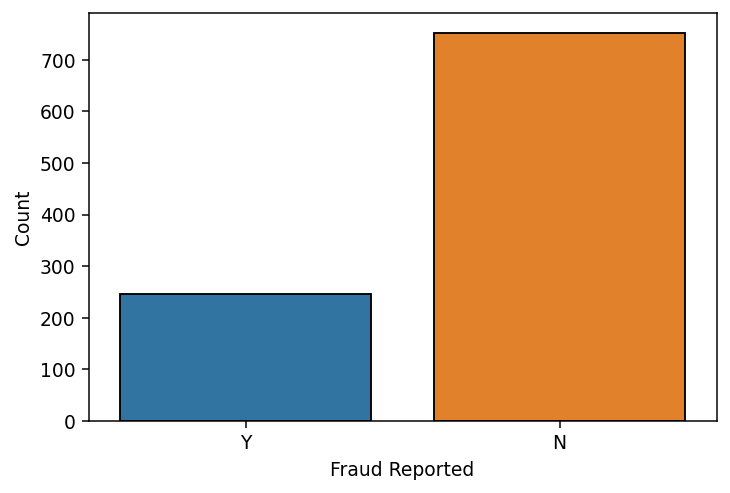

In [124]:
sns.countplot(data=df, x='fraud_reported', edgecolor='black')
plt.xlabel('Fraud Reported')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

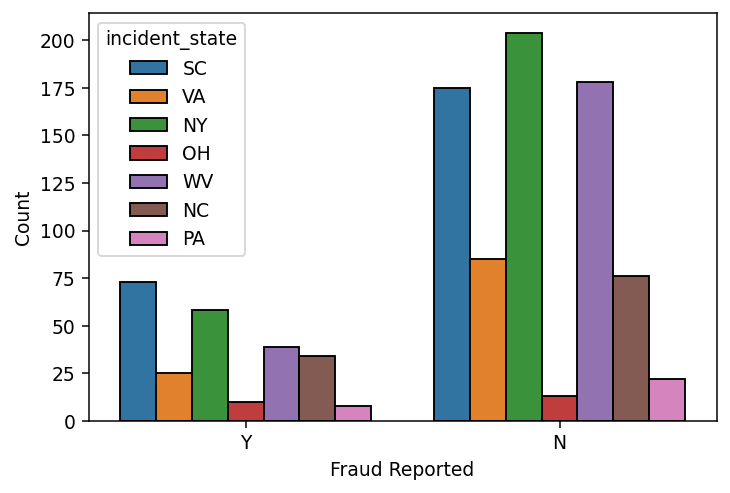

In [125]:
sns.countplot(data=df, x='fraud_reported', hue='incident_state', edgecolor='black')
plt.xlabel('Fraud Reported')
plt.ylabel('Count')
# SC higher incident rate than others? NY as well as WV also seem higher than others.

Text(0, 0.5, 'Count')

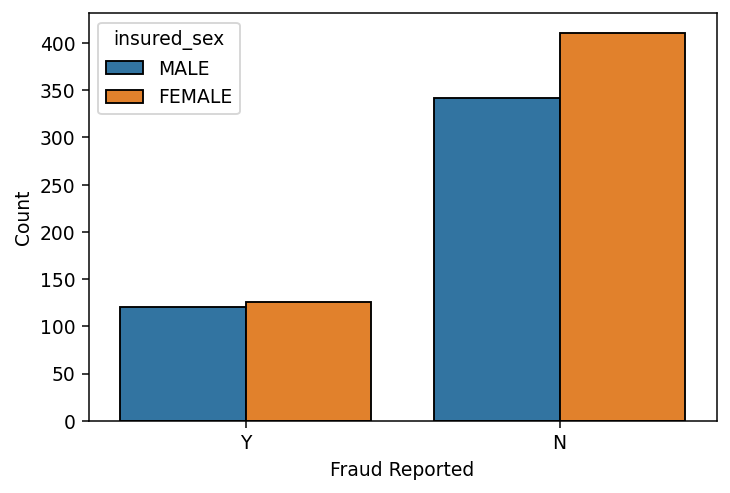

In [126]:
sns.countplot(data=df, x='fraud_reported', hue='insured_sex', edgecolor='black')
plt.xlabel('Fraud Reported')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

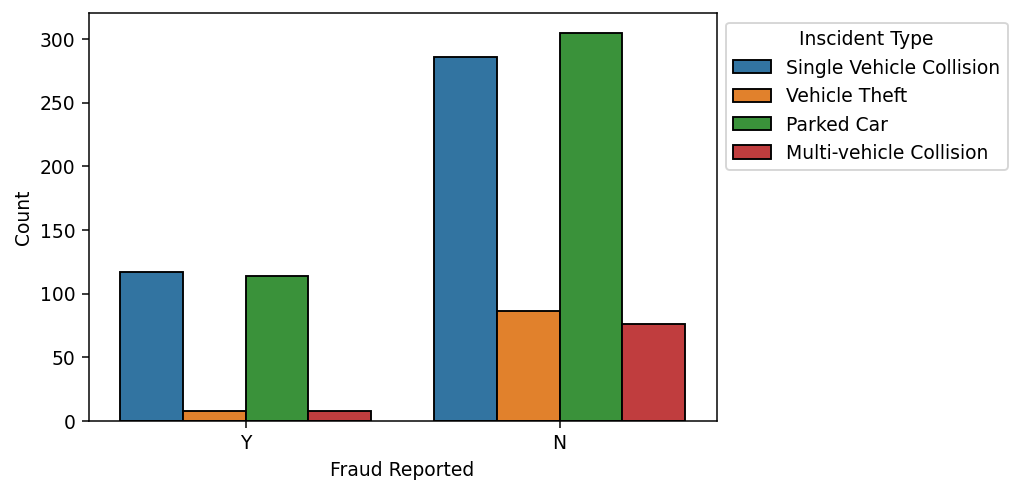

In [138]:
sns.countplot(data=df, x='fraud_reported', hue='incident_type', edgecolor='black')
plt.legend(labels=set(df['incident_type']), loc=2, bbox_to_anchor=(1,1), title='Inscident Type')
plt.xlabel('Fraud Reported')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

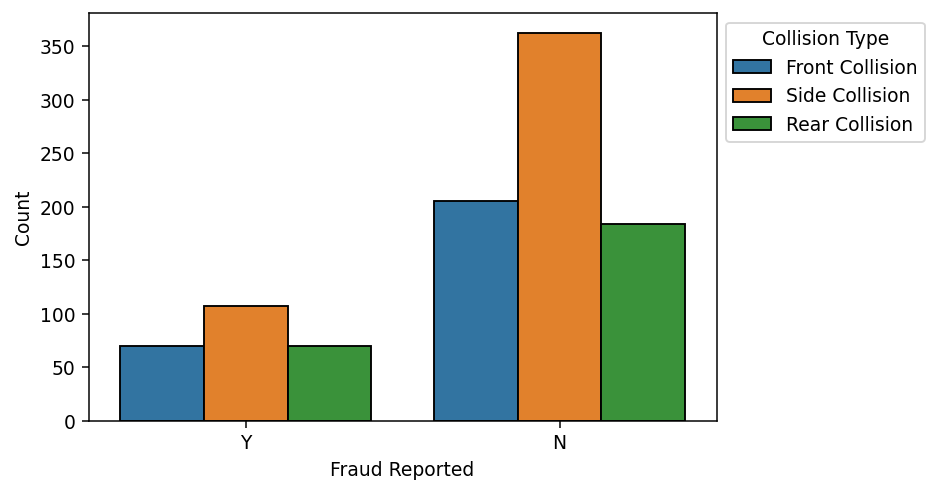

In [139]:
sns.countplot(data=df, x='fraud_reported', hue='collision_type', edgecolor='black')
plt.legend(labels=set(df['collision_type']), loc=2, bbox_to_anchor=(1,1), title='Collision Type')
plt.xlabel('Fraud Reported')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

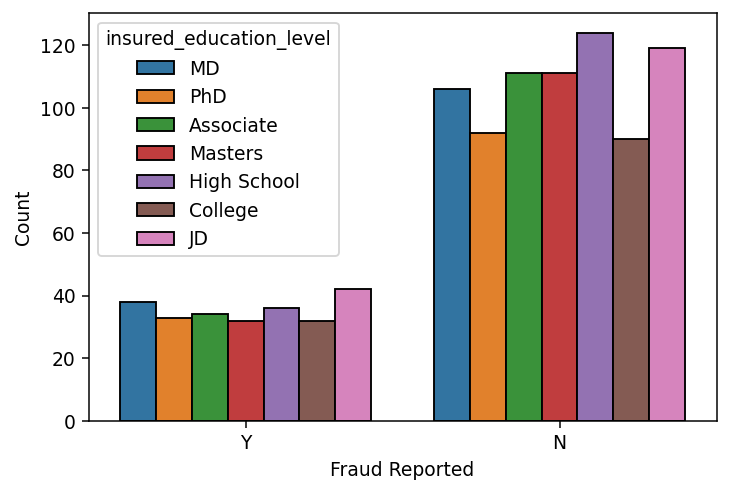

In [127]:
sns.countplot(data=df, x='fraud_reported', hue='insured_education_level', edgecolor='black')
plt.xlabel('Fraud Reported')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

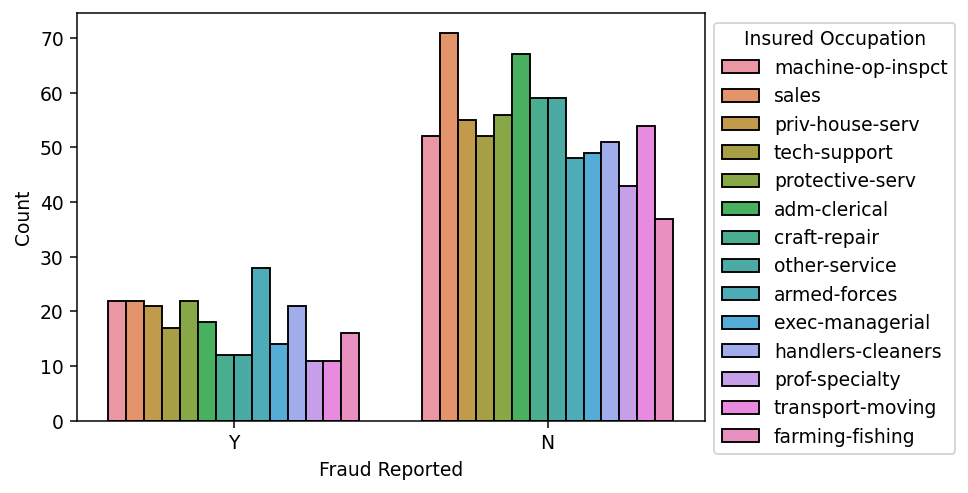

In [133]:
sns.countplot(data=df, x='fraud_reported', hue='insured_occupation', edgecolor='black')
plt.legend(labels=set(df['insured_occupation']), loc=2, bbox_to_anchor=(1,1), title='Insured Occupation')
plt.xlabel('Fraud Reported')
plt.ylabel('Count')
# exec-managerial is a bit higher on the fraud reported yes, with a slightly lower than other occupations for fraud reported no

Text(0, 0.5, 'Count')

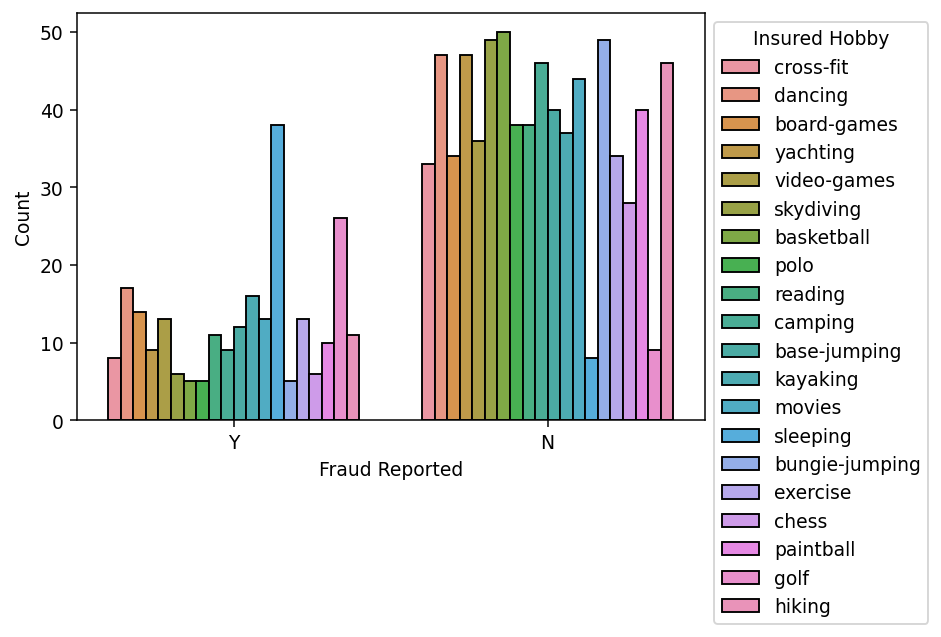

In [134]:
sns.countplot(data=df, x='fraud_reported', hue='insured_hobbies', edgecolor='black')
plt.legend(labels=set(df['insured_hobbies']), loc=2, bbox_to_anchor=(1,1), title='Insured Hobby')
plt.xlabel('Fraud Reported')
plt.ylabel('Count')
# Sleeping is very high for fraud reported yes, but very low for fraud reported no.
# Golf is also very high for fraud reported yes, but very low for fraud reported no

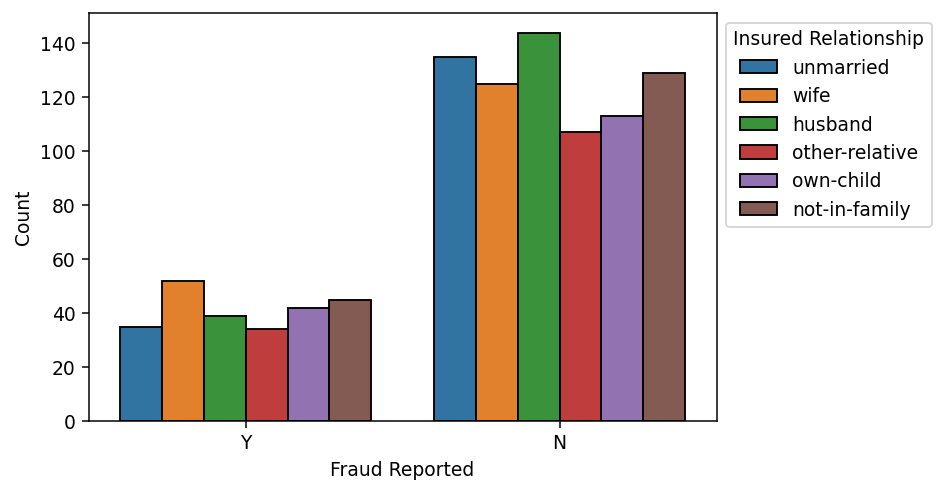

In [135]:
sns.countplot(data=df, x='fraud_reported', hue='insured_relationship', edgecolor='black')
plt.xlabel('Fraud Reported')
plt.ylabel('Count')
plt.legend(labels=set(df['insured_relationship']), loc=2, bbox_to_anchor=(1,1), title='Insured Relationship')

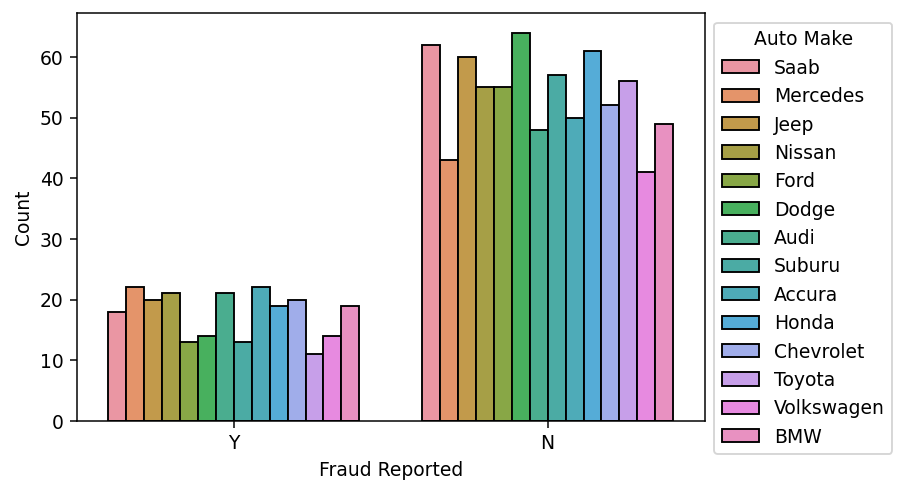

In [136]:
sns.countplot(data=df, x='fraud_reported', hue='auto_make', edgecolor='black')
plt.xlabel('Fraud Reported')
plt.ylabel('Count')
plt.legend(labels=set(df['auto_make']), loc=2, bbox_to_anchor=(1,1), title='Auto Make')

From quick visual exploration, some categorical features of note are insured hobby and insured occupation, with certain hobbies exhibiting a higher yes reported fraud and lower no reported fraud

# Beginning encoding  handling categorical data